In [7]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt 
import time 
# data preprocessing 
dataset=pd.read_csv('new_appdata100.csv')

# first thing to do is to split the response variable from the independent features
response = dataset["enrolled"]
# remove the response variable from the original dataset
dataset= dataset.drop(columns ='enrolled')

# now lets split the data into training and test data
# we import the split data function from sklearn 

from sklearn.model_selection import train_test_split

# it returns 4 variables two for training and 2 for testing 
# lets create them 
X_train ,  X_test ,y_train, y_test= train_test_split(dataset,response,
                                             test_size=0.2,
                                                 random_state=0 )
# random state allows to duplicate the random selection in other occasions


In [8]:
# notice we have a user id in the data , and that variable is not helpful cause it is just an identifier of the user
# so we are going to remove it from the data set
# but we need to keep in mind that we need to assiciate the prediction we get with the user it came from 

train_identifier= X_train['user'] # id identifier for user in the train part
X_train= X_train.drop(columns=['user'])

# same thing for test identifier 
test_identifier=X_test['user']
X_test=X_test.drop(columns =['user'])

In [9]:
#next step : feature Scaller
# we import that from sklearn 
from sklearn.preprocessing import StandardScaler
# important : StandardScaler return a numpy array of multiple dimensions 
# the problem with the process is that it losses the column name and also the index 
# and we need the index to identify which row of data we are dealing with
sc_X= StandardScaler()


In [13]:
# we store the scale result into another data frame , that way we are able to compare it 
# with the original
# we use fit_transform , it fit the data into the scaller 
X_train2= pd.DataFrame(sc_X.fit_transform(X_train))

# we do the same with X_test
X_test2= pd.DataFrame(sc_X.fit_transform(X_test))

In [14]:


# now we are going to set the columns of the dataset into the orginal 
X_train2.columns = X_train.columns.values
X_test2.columns =X_test.columns.values

# now we need to recover the indexes of the orginal data
X_train2.index = X_train.index.values
X_test2.index =X_test.index.values

X_train = X_train2
X_test = X_test2


In [16]:
# Model Building

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, penalty='l1')
classifier.fit(X_train,y_train)
# the model is fitted 


c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
# now we can predict 
y_pred= classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
# now lets evaluate our model 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score, recall_score

In [23]:
cm = confusion_matrix(y_test,y_pred) # to see how many prediction we have right 
accuracy_score(y_test,y_pred) # the accuracy is 76% which is not bad
# to make sure that this isnt happening because of some overfitting 
# let us see the precision : the precision is to see how many real positive we have in comparaision with true postive and false positive 
precision_score(y_test,y_pred)
# the precision is also 76% which is as precise as the accuracy 
# which is a good sign 

# now the recall 
# it is defined as true positives divided by the sum of true positives and false negatives 

recall_score(y_test,y_pred) # 77% which also good 

f1_score(y_test,y_pred) # 76% also good 


0.7661460957178842

Test Data Accuracy: 0.7679


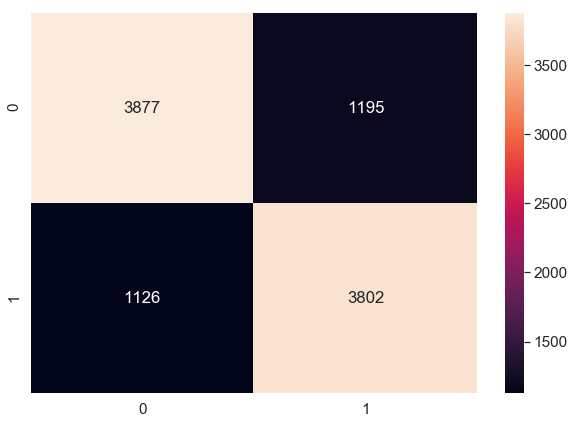

In [24]:
# confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [ ]:
# so we can see the positives prediction are very high compared to what we got wrong 
# true positives and false negatives we predicted are good (3802+3877)

In [29]:
# now we are going to use a technique that will allows us to split the data into 
# multiple subset and we are going to test our model on each subset 
# this is an extra step to validate our result 

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy : %0.3f (+/- %0.3f)" %(accuracies.mean(),accuracies.std()*2))

c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\user\anaconda3\envs\python5\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will 

Logistic Accuracy : 0.767 (+/- 0.010)


In [ ]:
# here we can see that the Logistic Accuracy : 0.767 (+/- 0.010) 
# so the standard deviation is 0.010 which is not that much 
# so the accuracy is also good

In [ ]:
# next step is to assiciate the predicition with the proper user to see 
# if the user is going to enroll or not 


In [30]:
# Formatting the Final Results 
final_results = pd.concat([y_test,test_identifier],axis=1).dropna()
final_results['predicted_results']= y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
